In [1]:
import os
import re
import matplotlib.pyplot as plt
from statistics import mean, median


def count_numbers_in_line(line):
    """Count the number of numbers (integers or floats) in a line."""
    return len(re.findall(r'-?\d+\.?\d*', line))

def process_files_in_folder(folder_path):
    """Process each file in the folder and return the combined list of numbers."""
    all_numbers = []

    # Iterate over all files in the folder
    clause_lengths = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Only process text files
        if os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                for line in file:
                    # Count numbers in each line
                    if line.strip():
                        clause_lengths += [len(line.split())]
                    

    return clause_lengths

def plot_histogram(numbers, output_file, max_range = 120, title  = f'Size of Globally blocked clauses'):
    """Plot a histogram of the numbers and save it to a file."""
    plt.figure(figsize=(10, 6))
    plt.hist(numbers, bins=100, range=(0,max_range), edgecolor='black')
    plt.title('Size of Globally blocked clauses ' + title)
    plt.xlabel('Size of Clause')
    plt.ylabel('Frequency')
    plt.savefig(output_file)
    print(f'Histogram saved to {output_file}')








In [3]:
folder_path = 'results_original_short/global_clauses'  # Change to your folder path
# folder_paths = ['global_clauses/random_false_learn_false', 'global_clauses/random_true_learn_false', 'global_clauses/random_false_learn_true', 'global_clauses/random_true_learn_true']
# for folder_path in folder_paths:
all_numbers = process_files_in_folder(folder_path)
print(f'Total numbers found: {len(all_numbers)}')


Total numbers found: 3875


Mean: 41.30374193548387
Median: 22
Histogram saved to propagation_histogram.png


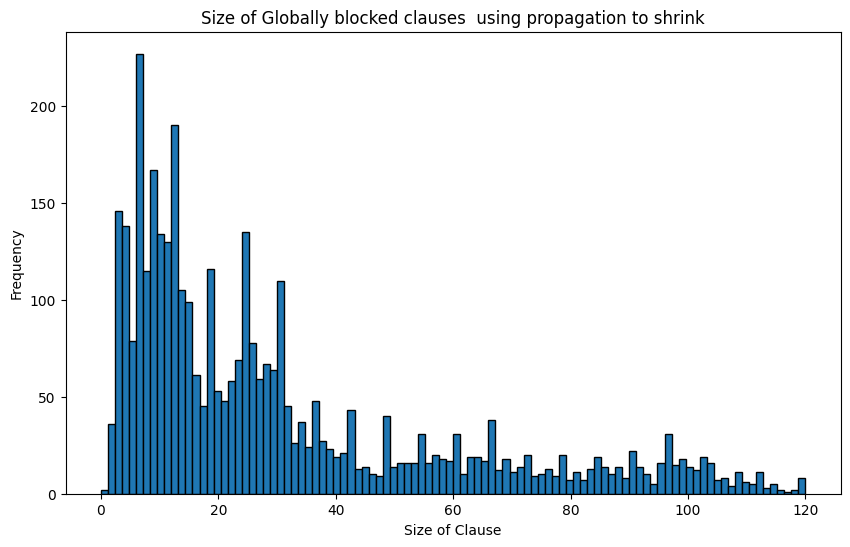

In [4]:
print(f"Mean: {mean(all_numbers)}")
print(f"Median: {median(all_numbers)}")

output_file = "propagation_histogram.png"
plot_histogram(all_numbers, output_file, title = " using propagation to shrink")

In [2]:
import re
import pandas as pd

def extract_results(file_path):
    pattern = re.compile(r"The file (.*?) returned (.*?) in time (.*?)!")
    data = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                file_name, result, time_limit = match.groups()
                data.append((file_name, result, time_limit))
    
    df = pd.DataFrame(data, columns=["file_name", "result", "time_limit"])
    return df

original_df = extract_results("run_short_original.txt")

# The file ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf returned SAT in time 4.4467597007751465!

print(original_df.to_string())

                                                                      file_name result          time_limit
0                    08ccc34df5d8eb9e9d45278af3dc093d-simon-r16-1.sanitized.cnf    SAT  0.9095914363861084
1                    3129198788f182ce6955b18aa3c7e61e-simon-r24-1.sanitized.cnf    SAT   0.815387487411499
2                    7e1d279559b202016e5797901e731a39-simon-r25-0.sanitized.cnf    SAT  0.7153890132904053
3                    7cbc3ce2052ba7c5b501f75af58ab3c4-simon-r22-1.sanitized.cnf    SAT  0.8153171539306641
4                    089f909e37b3ef0c4d90687f7e22b68f-simon-r18-0.sanitized.cnf    SAT  0.6153042316436768
5                    cdce6277b01ae06ddb95468c5f05de71-simon-r17-0.sanitized.cnf    SAT  1.5498383045196533
6                    5ee7de2bd112aa39485e79c9d487bf8f-simon-r23-1.sanitized.cnf    SAT  1.3995161056518555
7   ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf    SAT  4.4467597007751465
8                    2b043efb4bde6d83

In [6]:
folder_path = 'results_bcp_short/global_clauses'  # Change to your folder path
# folder_paths = ['global_clauses/random_false_learn_false', 'global_clauses/random_true_learn_false', 'global_clauses/random_false_learn_true', 'global_clauses/random_true_learn_true']
# for folder_path in folder_paths:
all_numbers = process_files_in_folder(folder_path)
print(f'Total numbers found: {len(all_numbers)}')

Total numbers found: 5998


Histogram saved to bcp_histogram.png
Mean: 71.60320106702234
Median: 32.0


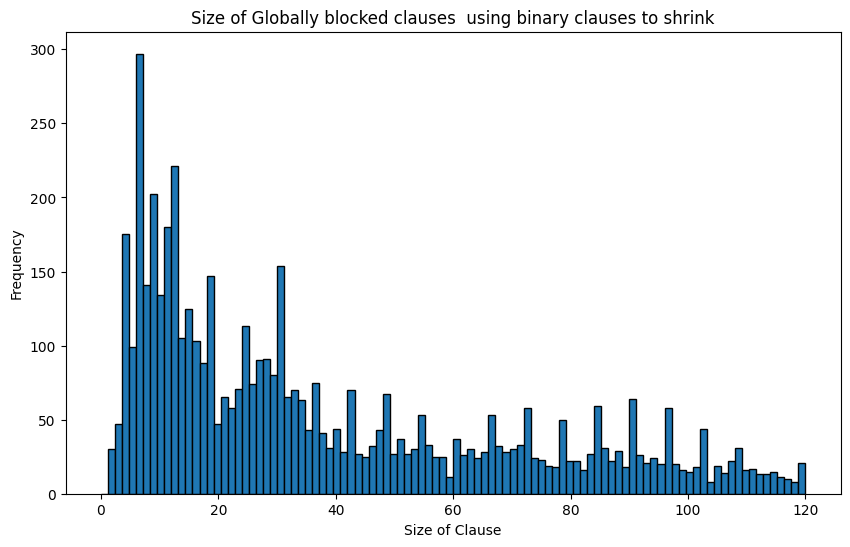

In [7]:
output_file = "bcp_histogram.png"
plot_histogram(all_numbers, output_file, title = " using binary clauses to shrink")

print(f"Mean: {mean(all_numbers)}")
print(f"Median: {median(all_numbers)}")

In [29]:
bcp_df = extract_results("run_short_bcp.txt")

# The file ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf returned SAT in time 4.4467597007751465!

print(bcp_df.to_string())

                                                                      file_name result          time_limit
0                    09d7add3bf3b75c5d1023a92e752989a-Break_unsat_04_03.xml.cnf  UNSAT  1.4163086414337158
1                    7e1d279559b202016e5797901e731a39-simon-r25-0.sanitized.cnf    SAT  0.9153308868408203
2                    089f909e37b3ef0c4d90687f7e22b68f-simon-r18-0.sanitized.cnf    SAT  0.6148049831390381
3   ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf    SAT   5.245961427688599
4                    08ccc34df5d8eb9e9d45278af3dc093d-simon-r16-1.sanitized.cnf    SAT  0.6149249076843262
5                    5ee7de2bd112aa39485e79c9d487bf8f-simon-r23-1.sanitized.cnf    SAT   0.815497875213623
6                          3988a60c6e93167763c6fd2a347d5859-Break_08_24.xml.cnf    SAT  24.893800497055054
7                    2b043efb4bde6d83f7c95a8e8e2d7bf8-simon-r21-0.sanitized.cnf    SAT  0.7152423858642578
8                    cdce6277b01ae06d

In [15]:
folder_path = 'results_noshrink_short/global_clauses'  # Change to your folder path
# folder_paths = ['global_clauses/random_false_learn_false', 'global_clauses/random_true_learn_false', 'global_clauses/random_false_learn_true', 'global_clauses/random_true_learn_true']
# for folder_path in folder_paths:
all_numbers = process_files_in_folder(folder_path)
print(f'Total numbers found: {len(all_numbers)}')

Total numbers found: 4730


Histogram saved to noshrink_histogram.png
Mean: 72.51014799154333
Median: 38.0


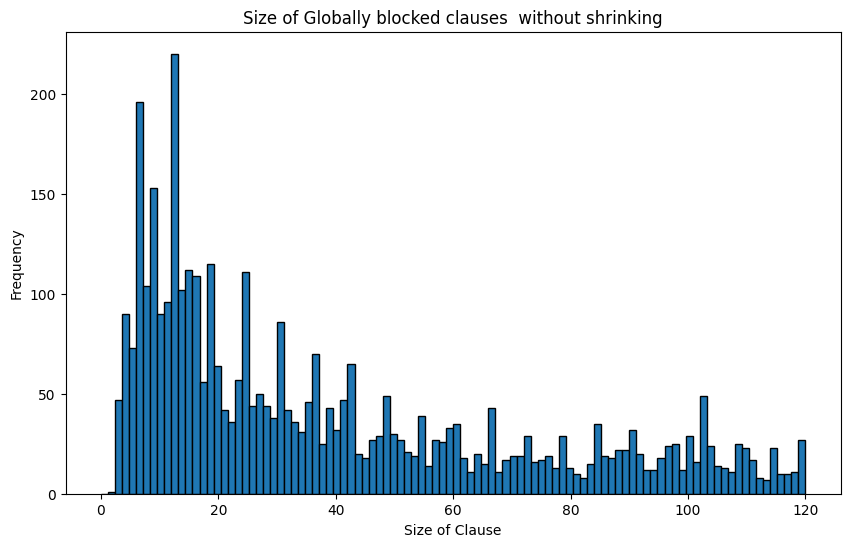

In [16]:
output_file = "noshrink_histogram.png"
plot_histogram(all_numbers, output_file, title = " without shrinking")

print(f"Mean: {mean(all_numbers)}")
print(f"Median: {median(all_numbers)}")

In [28]:
noshrink_df = extract_results("run_short_noshrink.txt")

# The file ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf returned SAT in time 4.4467597007751465!

print(noshrink_df.to_string())

                                                                      file_name result          time_limit
0                    089f909e37b3ef0c4d90687f7e22b68f-simon-r18-0.sanitized.cnf    SAT  0.6148622035980225
1                    7e1d279559b202016e5797901e731a39-simon-r25-0.sanitized.cnf    SAT  0.7148861885070801
2                    cdce6277b01ae06ddb95468c5f05de71-simon-r17-0.sanitized.cnf    SAT  0.6149821281433105
3                    08ccc34df5d8eb9e9d45278af3dc093d-simon-r16-1.sanitized.cnf    SAT  0.7077605724334717
4   ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf    SAT   5.247657299041748
5                     c801a020a6c8bc3c287fea495203b114-worker_20_40_20_0.95.cnf    SAT   42.29940867424011
6                    5ee7de2bd112aa39485e79c9d487bf8f-simon-r23-1.sanitized.cnf    SAT  0.7154669761657715
7                    3129198788f182ce6955b18aa3c7e61e-simon-r24-1.sanitized.cnf    SAT  0.7995035648345947
8                    09d7add3bf3b75c5

In [27]:
cadical_df = extract_results("run_short_cadical.txt")

# The file ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf returned SAT in time 4.4467597007751465!

print(cadical_df.to_string())


                                                                      file_name result          time_limit
0                    09d7add3bf3b75c5d1023a92e752989a-Break_unsat_04_03.xml.cnf  UNSAT  1.0158843994140625
1                    089f909e37b3ef0c4d90687f7e22b68f-simon-r18-0.sanitized.cnf    SAT  0.6149451732635498
2   ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf    SAT   5.104518890380859
3                    08ccc34df5d8eb9e9d45278af3dc093d-simon-r16-1.sanitized.cnf    SAT  0.8157863616943359
4                    7e1d279559b202016e5797901e731a39-simon-r25-0.sanitized.cnf    SAT  1.2160215377807617
5                    5ee7de2bd112aa39485e79c9d487bf8f-simon-r23-1.sanitized.cnf    SAT  0.8442554473876953
6                    4073757aae06fc2b50c043f088b132b4-simon-r19-1.sanitized.cnf    SAT  1.4466578960418701
7                    7cbc3ce2052ba7c5b501f75af58ab3c4-simon-r22-1.sanitized.cnf    SAT   1.015613079071045
8                    2fcd8533eba98196

In [32]:
cadical_gbc_df = extract_results("run_short_cadical_gbc.txt")

# The file ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf returned SAT in time 4.4467597007751465!

print(cadical_gbc_df.to_string())

                                                    file_name result          time_limit
0    ca14adcb9296a7b31d7815c2ed16d0f1-ITC2021_Early_3.xml.cnf    SAT   43.54937386512756
1   c801a020a6c8bc3c287fea495203b114-worker_20_40_20_0.95.cnf    SAT  34.099668979644775
2  09d7add3bf3b75c5d1023a92e752989a-Break_unsat_04_03.xml.cnf  UNSAT   1.115846872329712
3        3988a60c6e93167763c6fd2a347d5859-Break_08_24.xml.cnf    SAT   19.04442811012268


In [33]:
def combine_results(named_dfs):
    combined_df = None
    
    for name, df in named_dfs:
        df = df.rename(columns={"time_limit": name})
        if combined_df is None:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on=["file_name", "result"], how="outer")
    
    return combined_df


dfs = [("original", original_df), ("bcp", bcp_df), ("no_shrink", noshrink_df), ("cadical", cadical_df), ("cadical_gbc", cadical_gbc_df)]

combined_df = combine_results(dfs)
print(combined_df.to_string())

                                                                      file_name result            original                 bcp           no_shrink             cadical         cadical_gbc
0                    08ccc34df5d8eb9e9d45278af3dc093d-simon-r16-1.sanitized.cnf    SAT  0.9095914363861084  0.6149249076843262  0.7077605724334717  0.8157863616943359                 NaN
1                    3129198788f182ce6955b18aa3c7e61e-simon-r24-1.sanitized.cnf    SAT   0.815387487411499  0.9159071445465088  0.7995035648345947  0.7151594161987305                 NaN
2                    7e1d279559b202016e5797901e731a39-simon-r25-0.sanitized.cnf    SAT  0.7153890132904053  0.9153308868408203  0.7148861885070801  1.2160215377807617                 NaN
3                    7cbc3ce2052ba7c5b501f75af58ab3c4-simon-r22-1.sanitized.cnf    SAT  0.8153171539306641  0.8153471946716309  0.8155920505523682   1.015613079071045                 NaN
4                    089f909e37b3ef0c4d90687f7e22b68f-simon-r18-0

In [4]:
# with the non-trivial globally blocked clause
cadical_df = extract_results("slurm-29194003.out")

# The file ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf returned SAT in time 4.4467597007751465!

print(cadical_df.to_string())

                                                           file_name result          time_limit
0                   ef330d1b144055436a2d576601191ea5-crn_11_99_u.cnf  UNSAT    7.62450647354126
1                02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12.cnf  UNSAT   49.47585320472717
2         7f7109dce621ef361a72b3e8cee9a962-Break_unsat_06_07.xml.cnf  UNSAT   7.074420928955078
3           ca14adcb9296a7b31d7815c2ed16d0f1-ITC2021_Early_3.xml.cnf    SAT  2.4683494567871094
4     e6cdc2687fa53506021f05b60ad0c6a2-GracefulGraph-K05-P02_c18.cnf    SAT   43.46684193611145
5  c2bfe541b7cff948fa3193e9ca0eddee-frb45-21-2.used-as.sat04-884.cnf    SAT  50.124608516693115
6               3988a60c6e93167763c6fd2a347d5859-Break_08_24.xml.cnf    SAT  1.0666654109954834
7          c801a020a6c8bc3c287fea495203b114-worker_20_40_20_0.95.cnf    SAT   2.267960786819458
8         09d7add3bf3b75c5d1023a92e752989a-Break_unsat_04_03.xml.cnf  UNSAT  0.1657102108001709


In [1]:
print(len(['02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_86.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_83.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_87.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_65.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_32.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_34.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_60.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_22.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_203.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_28.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_16.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_168.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_118.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_155.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_137.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_4.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_98.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_250.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_19.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_41.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_39.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_134.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_127.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_76.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_69.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_106.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_15.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_147.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_113.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_9.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_40.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_73.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_44.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_49.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_42.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_91.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_37.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_23.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_93.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_27.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_72.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_89.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_120.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_107.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_174.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_55.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_12.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_47.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_110.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_46.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_61.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_123.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_108.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_84.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_176.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_121.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_112.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_260.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_175.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_258.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_52.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_154.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_99.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_25.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_125.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_111.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_220.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_5.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_94.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_66.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_133.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_17.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_261.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_11.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_126.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_158.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_77.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_117.cnf', '02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12_163.cnf']))


79


In [3]:
# with the non-trivial globally blocked clause
cadical_df = extract_results("slurm-29366589.out")

# The file ae9522ea003ea9f75891b2d37a5e264b-srhd-sgi-m37-q446.25-n35-p30-s33692332.cnf returned SAT in time 4.4467597007751465!

print(cadical_df.to_string())

                                                                                          file_name result           time_limit
0   1427381a809c64c721838894ece6756d-shuffling-2-s25242449-of-bench-sat04-727.used-as.sat04-753.cnf    SAT    37.41261839866638
1                                       eddd68e14d69cce7190b99f4e7abdafb-x9-10098.sat.sanitized.cnf    SAT    38.61191391944885
2                                        4073757aae06fc2b50c043f088b132b4-simon-r19-1.sanitized.cnf    SAT  0.11553144454956055
3                                               02066c116dbacc40ec5cca2067db26c0-mrpp_4x4#12_12.cnf  UNSAT    43.76727247238159
4                                        3129198788f182ce6955b18aa3c7e61e-simon-r24-1.sanitized.cnf    SAT   0.1158449649810791
5                                 c2bfe541b7cff948fa3193e9ca0eddee-frb45-21-2.used-as.sat04-884.cnf    SAT    50.82947754859924
6                                        2b043efb4bde6d83f7c95a8e8e2d7bf8-simon-r21-0.sanitized.cnf    S